In [1]:
from zlib import crc32

import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns
import itertools

In [2]:
#Генерируем выборку
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code%(2**32-1))
    ars = np.random.RandomState(code%(2**16-1))
    if rs.randint(low=0, high=2) == 0:
        while True:
            data = rs.randn(20)
            if st.shapiro(data)[1] > 0.2 or ars.binomial(100, 0.05) > 10:
                break
    else:
        while True:
            data = np.concatenate([rs.randn(6) - 2, rs.randn(6) + 2])
            if st.shapiro(data)[1] < 0.01 or ars.binomial(100, 0.05) > 10:
                break
    return data

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

Enter your mail: salnikov.an@phystech.edu


In [4]:
task

{'mail': 'salnikov.an@phystech.edu',
 'id': 3521459763,
 'data': array([-2.28716849, -3.14184052, -2.72820726, -2.03504712, -2.95605959,
        -3.07529924,  3.39724121,  3.36395748,  2.42328337,  2.34789355,
         1.30952364,  3.30664915])}

In [5]:
data = task['data']

In [6]:
data

array([-2.28716849, -3.14184052, -2.72820726, -2.03504712, -2.95605959,
       -3.07529924,  3.39724121,  3.36395748,  2.42328337,  2.34789355,
        1.30952364,  3.30664915])

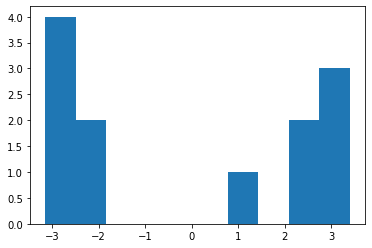

In [7]:
#Применим ли t-критерий Стьюдента? Да, если выборка нормальная. Проверяем это.

plt.hist(data)
plt.show()

In [8]:
#Очень не похоже на нормальную, применим критерий Шапиро-Уилка
print('p_value = {}'.format(st.shapiro(data)[1]))

p_value = 0.008095929399132729


In [9]:
#p_value < 0.05 -> Отвергаем гипотезу нормальности, t-критерий не применим

In [10]:
#p-value для  критерия знаковых рангов Уилкоксона (m0=0)

print('p_value = {}'.format(st.wilcoxon(data)[1]))

p_value = 0.791015625


In [11]:
#p-value для критерия знаков (m0=0)
from statsmodels.stats.descriptivestats import sign_test
print('p_value = {}'.format(sign_test(data)[1]))

p_value = 1.0


In [12]:
#Рассмотрим перестановочный критерий для среднего. Сколько перестановок требуется рассмотреть для данной выборки?
print('Число перестановок = {}'.format(2**data.shape[0]))

Число перестановок = 4096


In [13]:
#Рассмотрим перестановочный критерий для проверки среднего (m0=0.5)
#Для какого количества перестановок статистика T будет иметь значение меньшее или равное статистике для оригинальной выборки?

t = data - 0.5
T = np.sum(t)
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=data.shape[0]):
    count += 1
    stat = np.dot(t, v)
    if stat <= T:
        good+=1
    
      
print('good_count =', good)

good_count = 1111


In [14]:
#Бутстреп
rs = np.random.RandomState(0)

ind = rs.randint(low=0, high=data.shape[0], size=(10000, data.shape[0]))
results = []
for i in ind:
    sample = data[i]
    results.append(sample.mean())

np.percentile(results, [2.5, 97.5])

array([-1.54145198,  1.5321717 ])